# Aula 08 - Aprendendo a Ranquear - Exemplos

In [1]:
import pandas as pd
import numpy as np
import random

## Implementação do BPR

### Importar base de dados

In [3]:
import wget
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
!tar -xvzf ml-20m-compact.tar.gz

100% [....................................................] 65019041 / 65019041
Saved under ml-20m-compact.tar.gz
x dataset/
x dataset/tags_sample.csv
x dataset/.DS_Store
x dataset/movies_sample.csv
x dataset/genome-tags.csv
x dataset/ml-youtube.csv
x dataset/genome-scores.csv
x dataset/ratings_sample.csv


In [2]:
movies = pd.read_csv('./dataset/movies_sample.csv', names=['itemId', 'title', 'genre'], header=0)
ratings = pd.read_csv('./dataset/ratings_sample.csv', names=['userId', 'itemId', 'rating', 'timestamp'], header=0)
df = ratings[['userId', 'itemId', 'rating']]
df = df.merge(movies[['itemId', 'title']])
df

,userId,itemId,rating,title
0,11,7481,5.0,Enemy Mine (1985)
1,359,7481,4.0,Enemy Mine (1985)
2,422,7481,3.0,Enemy Mine (1985)
3,424,7481,3.0,Enemy Mine (1985)
4,744,7481,3.0,Enemy Mine (1985)
...,...,...,...,...
190616,131651,118606,3.5,Dots (1940)
190617,134567,118606,3.5,Dots (1940)
190618,131651,96257,1.0,Heroic Purgatory (Rengoku eroica) (1970)
190619,131651,98337,4.0,97 Percent True (2008)


### Mapeamento de ids

In [3]:
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.itemId.unique())}
df['userId'] = df['userId'].map(map_users)
df['itemId'] = df['itemId'].map(map_items)
map_title = {}

for _, row in df.iterrows():
    map_title[row.itemId] = row.title


### Funções para obter informações específicas do DataFrame

In [4]:
# Obter a nota que um usuário deu para um item.
def get_rating(df, userId, itemId):
    if len(df[(df['userId']==userId)&(df['itemId']==itemId)]) == 0:
        return 0
    return (df.loc[(df.userId==userId) & (df.itemId == itemId),'rating'].iloc[0])

get_rating(df, 1, 5)

2.5

In [5]:
# Obter a lista de todos os itens que um usuário avaliou.
def get_item_ids(df, userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'itemId'].tolist())

get_item_ids(df, 0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [6]:
# Obter o título do item dado o seu id.
def get_item_title(itemId):
    if itemId not in df['itemId'].values:
        return ''
    return (df.loc[(df.itemId == itemId),'title'].iloc[0])

get_item_title(0)

'Enemy Mine (1985)'

In [7]:
# Obter a lista de ratings de um usuário.
def get_user_ratings(df, userId):
    if userId not in df['userId'].values:
        return []
    return (df.loc[(df.userId==userId),'rating'].tolist())

get_user_ratings(df, 0)

[5.0, 4.5, 4.0, 2.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 3.5, 5.0]

In [8]:
# Obter a média de ratings de um usuário
def get_user_mean(df, userId):
    return np.mean(get_user_ratings(df, userId))

get_user_mean(df, 1)

3.38

In [9]:
# Obter a lista de todos os usuários que avaliaram o item
def get_user_ids(df, itemId):
    if itemId not in df['itemId'].values:
        return []
    return (df.loc[(df.itemId==itemId),'userId'].tolist())

# Obter a média de notas do item
def get_item_mean(df, itemId):
    return np.mean(get_item_ratings(df, itemId))

# Obter todas as notas do item
def get_item_ratings(df, itemId):
    if itemId not in df['itemId'].values:
        return []
    return (df.loc[(df.itemId==itemId),'rating'].tolist())

get_item_ratings(df, 0)

[5.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 5.0,
 2.0,
 3.5,
 3.0,
 2.5,
 2.5,
 2.5,
 4.0,
 3.5,
 3.0,
 3.5,
 5.0,
 5.0,
 3.5,
 3.0,
 3.5,
 3.5,
 3.5,
 4.0,
 3.0,
 2.5,
 3.0,
 4.5,
 2.5,
 4.0,
 4.0,
 3.5,
 4.0,
 4.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.5,
 3.0,
 4.5,
 3.5,
 2.5,
 3.0,
 3.5,
 3.0,
 3.5,
 2.0,
 0.5,
 3.5,
 5.0,
 3.5,
 2.5,
 4.0,
 3.0,
 2.5,
 4.0,
 2.5,
 4.5,
 4.0,
 1.5,
 3.0,
 3.0,
 3.5,
 3.0,
 3.5,
 2.5,
 4.5,
 3.5,
 3.5,
 4.0,
 1.5,
 3.5,
 3.5,
 4.0,
 3.0,
 2.0,
 4.0,
 1.5,
 3.5,
 2.5,
 3.5,
 5.0,
 1.5,
 3.5,
 3.5,
 1.5,
 3.0,
 3.0,
 2.5,
 5.0,
 3.5,
 2.5,
 3.5,
 3.5,
 4.0,
 4.0,
 3.0,
 3.5,
 3.0,
 2.5,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.5,
 4.0,
 4.0,
 4.0,
 3.0,
 4.0,
 3.0,
 5.0,
 2.0,
 5.0,
 3.5,
 4.0,
 3.0,
 4.0,
 4.0,
 3.5,
 4.5,
 3.0,
 3.5,
 3.0,
 3.0,
 5.0,
 3.5,
 4.5,
 4.5,
 4.0,
 3.5,
 4.0,
 3.5,
 2.0,
 3.0,
 3.0,
 5.0,
 5.0,
 3.0,
 4.0,
 4.0,
 4.0,
 3.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 2.0,
 3.5,
 2.5,
 1.0,
 4.0,
 3.5,
 4.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0

### Divisão da base em treino e teste

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)

### Função para recuperar um par de itens (i, j) de um dado usuário, onde i é um item conhecido e j é um item desconhecido

In [12]:
observed = dict()
unobserved = dict()
all_users = df['userId'].unique().tolist() # usar conj. total
all_items = df['itemId'].unique().tolist() # usar conj. total

for u in all_users:
    observed[u] = get_item_ids(train, u) # usar conj. de treinamento
    unobserved[u] = list(set(all_items)-set(observed[u]))

def draw(userId):    
    i = random.choice(observed[userId])
    j = random.choice(unobserved[userId])
    return i, j

draw(2)


(65, 10)

### Treinamento do modelo

In [57]:
def train_bprmf(train, n_factors, lr=0.05, reg=0.02, miter=30):    
    n_users = df['userId'].max()+1
    n_items = df['itemId'].max()+1    
    item_bias = np.zeros(n_items)
    p = np.random.normal(0, 0.1, (n_users, n_factors))
    q = np.random.normal(0, 0.1, (n_items, n_factors))
    
    error = []
    for t in range(miter):
        print('Iter #', t)
        sq_error = 0
        random_users = random.choices(train['userId'].unique(), k=len(train))
        for u in random_users:
            i, j = draw(u)
            x_uij = item_bias[i] - item_bias[j] + (np.dot(p[u], q[i]) - np.dot(p[u], q[j]))
            sq_error += x_uij
            
            eps = 1 / (1 + np.exp(x_uij))

            item_bias[i] += lr * (eps - reg * item_bias[i])
            item_bias[j] += lr * (-eps - reg * item_bias[j])            

            # Adjust the factors
            u_f = p[u]
            i_f = q[i]
            j_f = q[j]

            # Compute and apply factor updates
            p[u] += lr * ((i_f - j_f) * eps - reg * u_f)
            q[i] += lr * (u_f * eps - reg * i_f)
            q[j] += lr * (-u_f * eps - reg * j_f)
            
        error.append(sq_error/len(random_users))
            
    return item_bias, p, q, error

In [58]:
b, p, q, error = train_bprmf(train, 4)

Iter # 0
Iter # 1
Iter # 2
Iter # 3
Iter # 4
Iter # 5
Iter # 6
Iter # 7
Iter # 8
Iter # 9
Iter # 10
Iter # 11
Iter # 12
Iter # 13
Iter # 14
Iter # 15
Iter # 16
Iter # 17
Iter # 18
Iter # 19
Iter # 20
Iter # 21
Iter # 22
Iter # 23
Iter # 24
Iter # 25
Iter # 26
Iter # 27
Iter # 28
Iter # 29


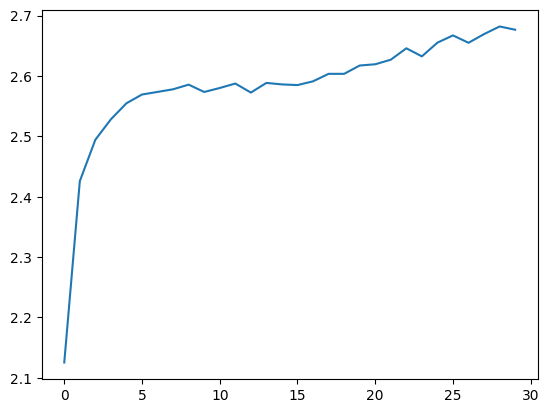

In [59]:
import matplotlib.pyplot as plt

plt.plot(error)
plt.show()

### Gerar N recomendações para cada usuário

In [60]:
def predict(N=10):
    w = b.T + np.dot(p, q.T)
    ranking = []
    
    for u, user in enumerate(all_users):
        partial_ranking = list()
        candidate_items = sorted(range(len(w[u])), key=lambda k: w[u][k], reverse=True)
        
        for i in candidate_items:
            if i not in observed[user]:
                partial_ranking.append((user, i, w[u][i]))

            if len(partial_ranking) == N:
                break

        ranking += partial_ranking
        
    return pd.DataFrame(ranking, columns=['userId', 'movieId', 'score'])
    

In [61]:
ranking = predict()

In [62]:
ranking['title'] = ranking.movieId.map(map_title)
ranking[ranking['userId'] == 0]

,userId,movieId,score,title
0,0,19,2.109218,Reservoir Dogs (1992)
1,0,5,2.040924,"I, Robot (2004)"
2,0,17,1.988660,Chasing Amy (1997)
3,0,22,1.937108,Natural Born Killers (1994)
4,0,18,1.871620,Life Is Beautiful (La Vita è bella) (1997)
5,0,21,1.864385,Conspiracy Theory (1997)
6,0,57,1.848631,Lara Croft: Tomb Raider (2001)
7,0,23,1.840728,Crimson Tide (1995)
8,0,20,1.740215,While You Were Sleeping (1995)
9,0,33,1.693791,North by Northwest (1959)


## Case Recommender

In [52]:
train.to_csv('train.dat', index=False, header=False, sep='\t')
test.to_csv('test.dat', index=False, header=False, sep='\t')

In [53]:
from caserec.recommenders.item_recommendation.bprmf import BprMF

BprMF('train.dat', 'test.dat', 'ir_bprmf.dat').compute()

[Case Recommender: Item Recommendation > BPRMF]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

training_time:: 105.625981 sec
prediction_time:: 2.096710 sec


Eval:: PREC@1: 0.364467 PREC@3: 0.277825 PREC@5: 0.23717 PREC@10: 0.180482 RECALL@1: 0.117204 RECALL@3: 0.251777 RECALL@5: 0.35447 RECALL@10: 0.524555 MAP@1: 0.364467 MAP@3: 0.463026 MAP@5: 0.473589 MAP@10: 0.449331 NDCG@1: 0.364467 NDCG@3: 0.555233 NDCG@5: 0.583212 NDCG@10: 0.580688 


In [55]:
recs = pd.read_csv('ir_bprmf.dat', sep='\t', names=['userId', 'itemId', 'score'])
recs['title'] = recs.itemId.map(map_title)
recs[recs['userId'] == 0]

,userId,itemId,score,title
0,0,19,7.797298,Reservoir Dogs (1992)
1,0,22,7.141001,Natural Born Killers (1994)
2,0,39,6.746890,Knocked Up (2007)
3,0,30,6.644180,Collateral (2004)
4,0,5,6.569537,"I, Robot (2004)"
5,0,17,6.469478,Chasing Amy (1997)
6,0,33,6.449191,North by Northwest (1959)
7,0,56,6.396477,Showgirls (1995)
8,0,18,6.263469,Life Is Beautiful (La Vita è bella) (1997)
9,0,23,6.047112,Crimson Tide (1995)
